In [2]:
library(tidyverse)
library(dslabs)

Warning message:
"package 'dslabs' was built under R version 3.6.3"

Compare variation in values between small number of items (or categories) with respect to a fixed reference.

# Diverging bar 

Given the gapminder dataset which includes the the GDP per Capita for 142 countries, let’s say we are interested in creating a plot to answers the question: “What is the percentage change in GDP per capita in Americas continent between 1980 and 1990?” .

In [53]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


In [54]:
year_1997 <- gapminder %>%
filter(year == 1980 & continent == 'Americas') %>%
select(country, gdp)

year_2007 <- gapminder %>%
filter(year == 1990 & continent == 'Americas') %>%
select(country, gdp)

gdp_change <- merge(year_1997, year_2007, by = 'country', suffixes = c('_1997', '_2007')) %>%
mutate(change = (gdp_2007 - gdp_1997) / gdp_1997 * 100) %>%
mutate(country = reorder(country, change))

gdp_change %>% head()

country,gdp_1997,gdp_2007,change
Antigua and Barbuda,325800873,588059030,80.49646
Argentina,212127318774,182208881977,-14.10400
Aruba,NA,1147728451,NA
Bahamas,3781200313,5115006358,35.27467
Barbados,1955993039,2198255970,12.38567
Belize,289162816,468300000,61.95028


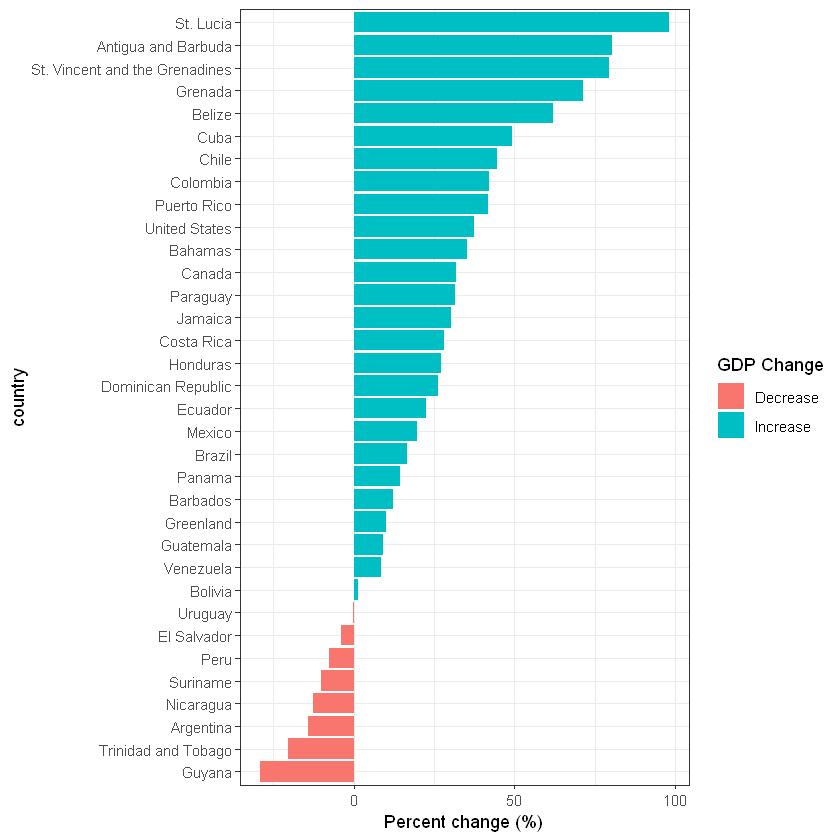

In [64]:
gdp_change %>%
filter(!is.na(change)) %>%
ggplot(aes(country, change, fill = change > 0)) + 
geom_col() +
coord_flip() +
scale_fill_discrete(name = 'GDP Change', labels = c('Decrease', 'Increase')) +
ylab('Percent change (%)') +
theme_bw() 

# Diverging Lollipop Chart

Lollipop chart conveys the same information as bar chart and diverging bar. Except that it looks more modern.

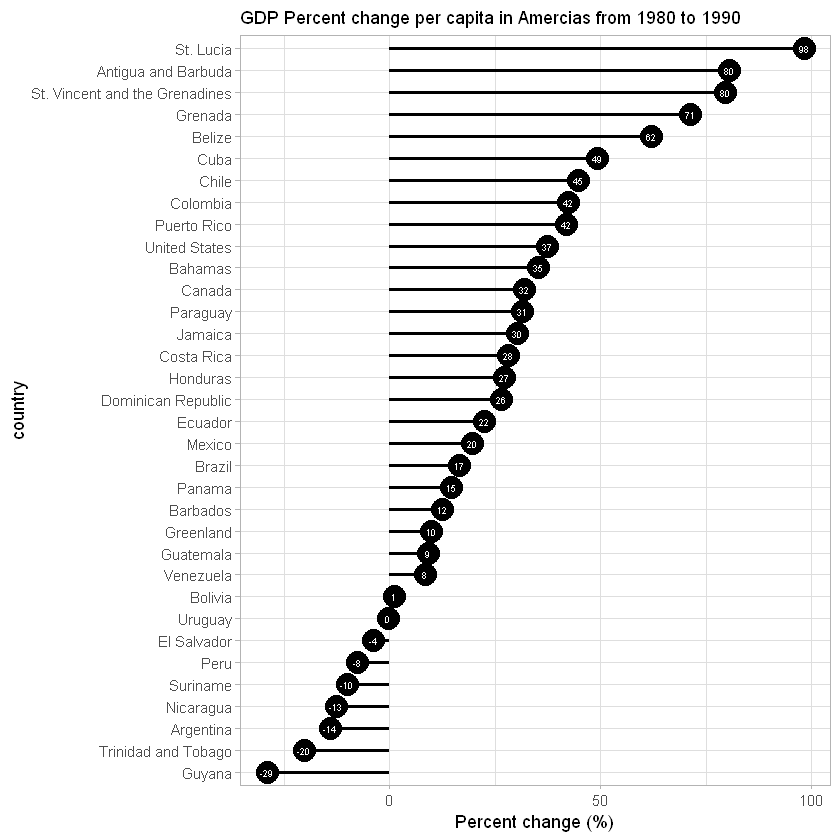

In [82]:
gdp_change %>%
filter(!is.na(change)) %>%
ggplot(aes(country, change, label = round(change))) + 
geom_segment(aes(x = country, xend = country, y = 0, yend = change), size = 1) +
geom_point(size = 6) +
geom_text(color = 'white', size = 2, hjust = 0.5, vjust = 0.5) +
coord_flip() +
labs(y = 'Percent change (%)', subtitle = 'GDP Percent change per capita in Amercias from 1980 to 1990') +
theme_light()

# Diverging Dot Plot

Dot plot conveys similar information. The principles are same as what we saw in Diverging bars, except that only point are used.

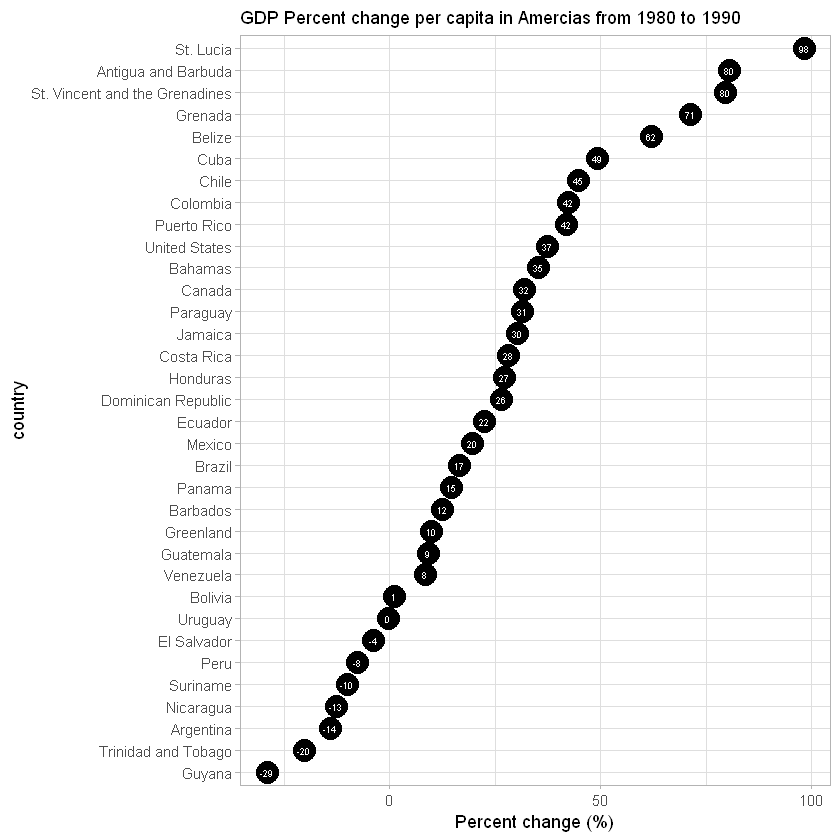

In [83]:
gdp_change %>%
filter(!is.na(change)) %>%
ggplot(aes(country, change, label = round(change))) + 
geom_point(size = 6) +
geom_text(color = 'white', size = 2, hjust = 0.5, vjust = 0.5) +
coord_flip() +
labs(y = 'Percent change (%)', subtitle = 'GDP Percent change per capita in Amercias from 1980 to 1990') +
theme_light()

# Area chart

Area charts are typically used to visualize how a particular metric (such as % returns from a stock) performed compared to a certain baseline. Other types of %returns or %change data are also commonly used.

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


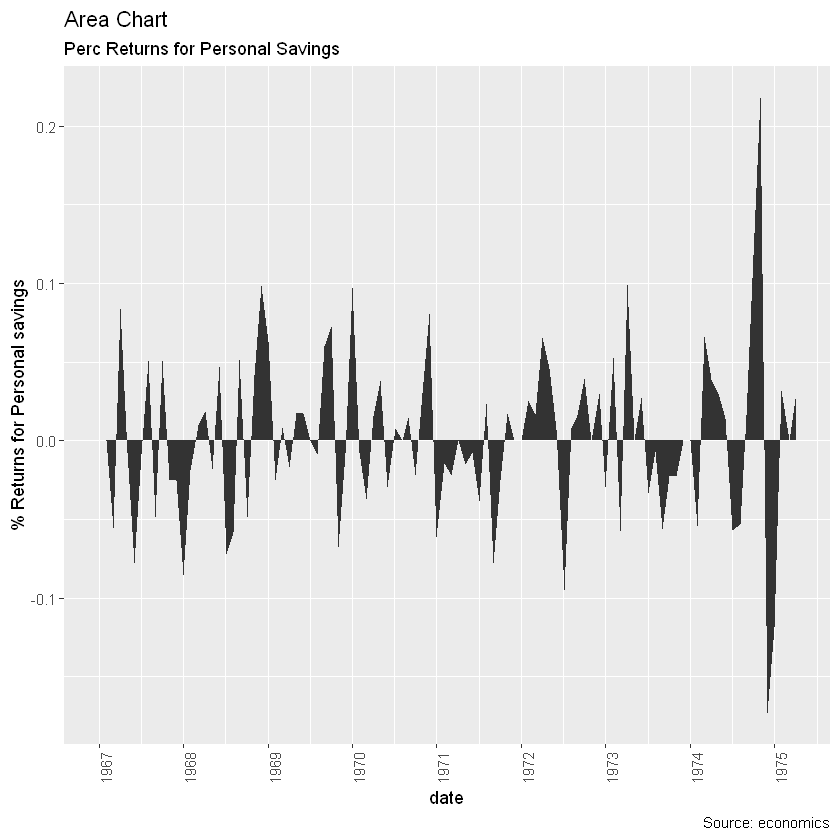

In [87]:
library(ggplot2)
library(quantmod)
data("economics", package = "ggplot2")

# Compute % Returns
economics$returns_perc <- c(0, diff(economics$psavert)/economics$psavert[-length(economics$psavert)])

# Create break points and labels for axis ticks
brks <- economics$date[seq(1, length(economics$date), 12)]
lbls <- lubridate::year(economics$date[seq(1, length(economics$date), 12)])

# Plot
ggplot(economics[1:100, ], aes(date, returns_perc)) + 
  geom_area() + 
  scale_x_date(breaks=brks, labels=lbls) + 
  theme(axis.text.x = element_text(angle=90)) + 
  labs(title="Area Chart", 
       subtitle = "Perc Returns for Personal Savings", 
       y="% Returns for Personal savings", 
       caption="Source: economics")